In [6]:
library(reshape2)
library(ggplot2)
`%ni%` = Negate(`%in%`)

Using , puck, id, L as id variables



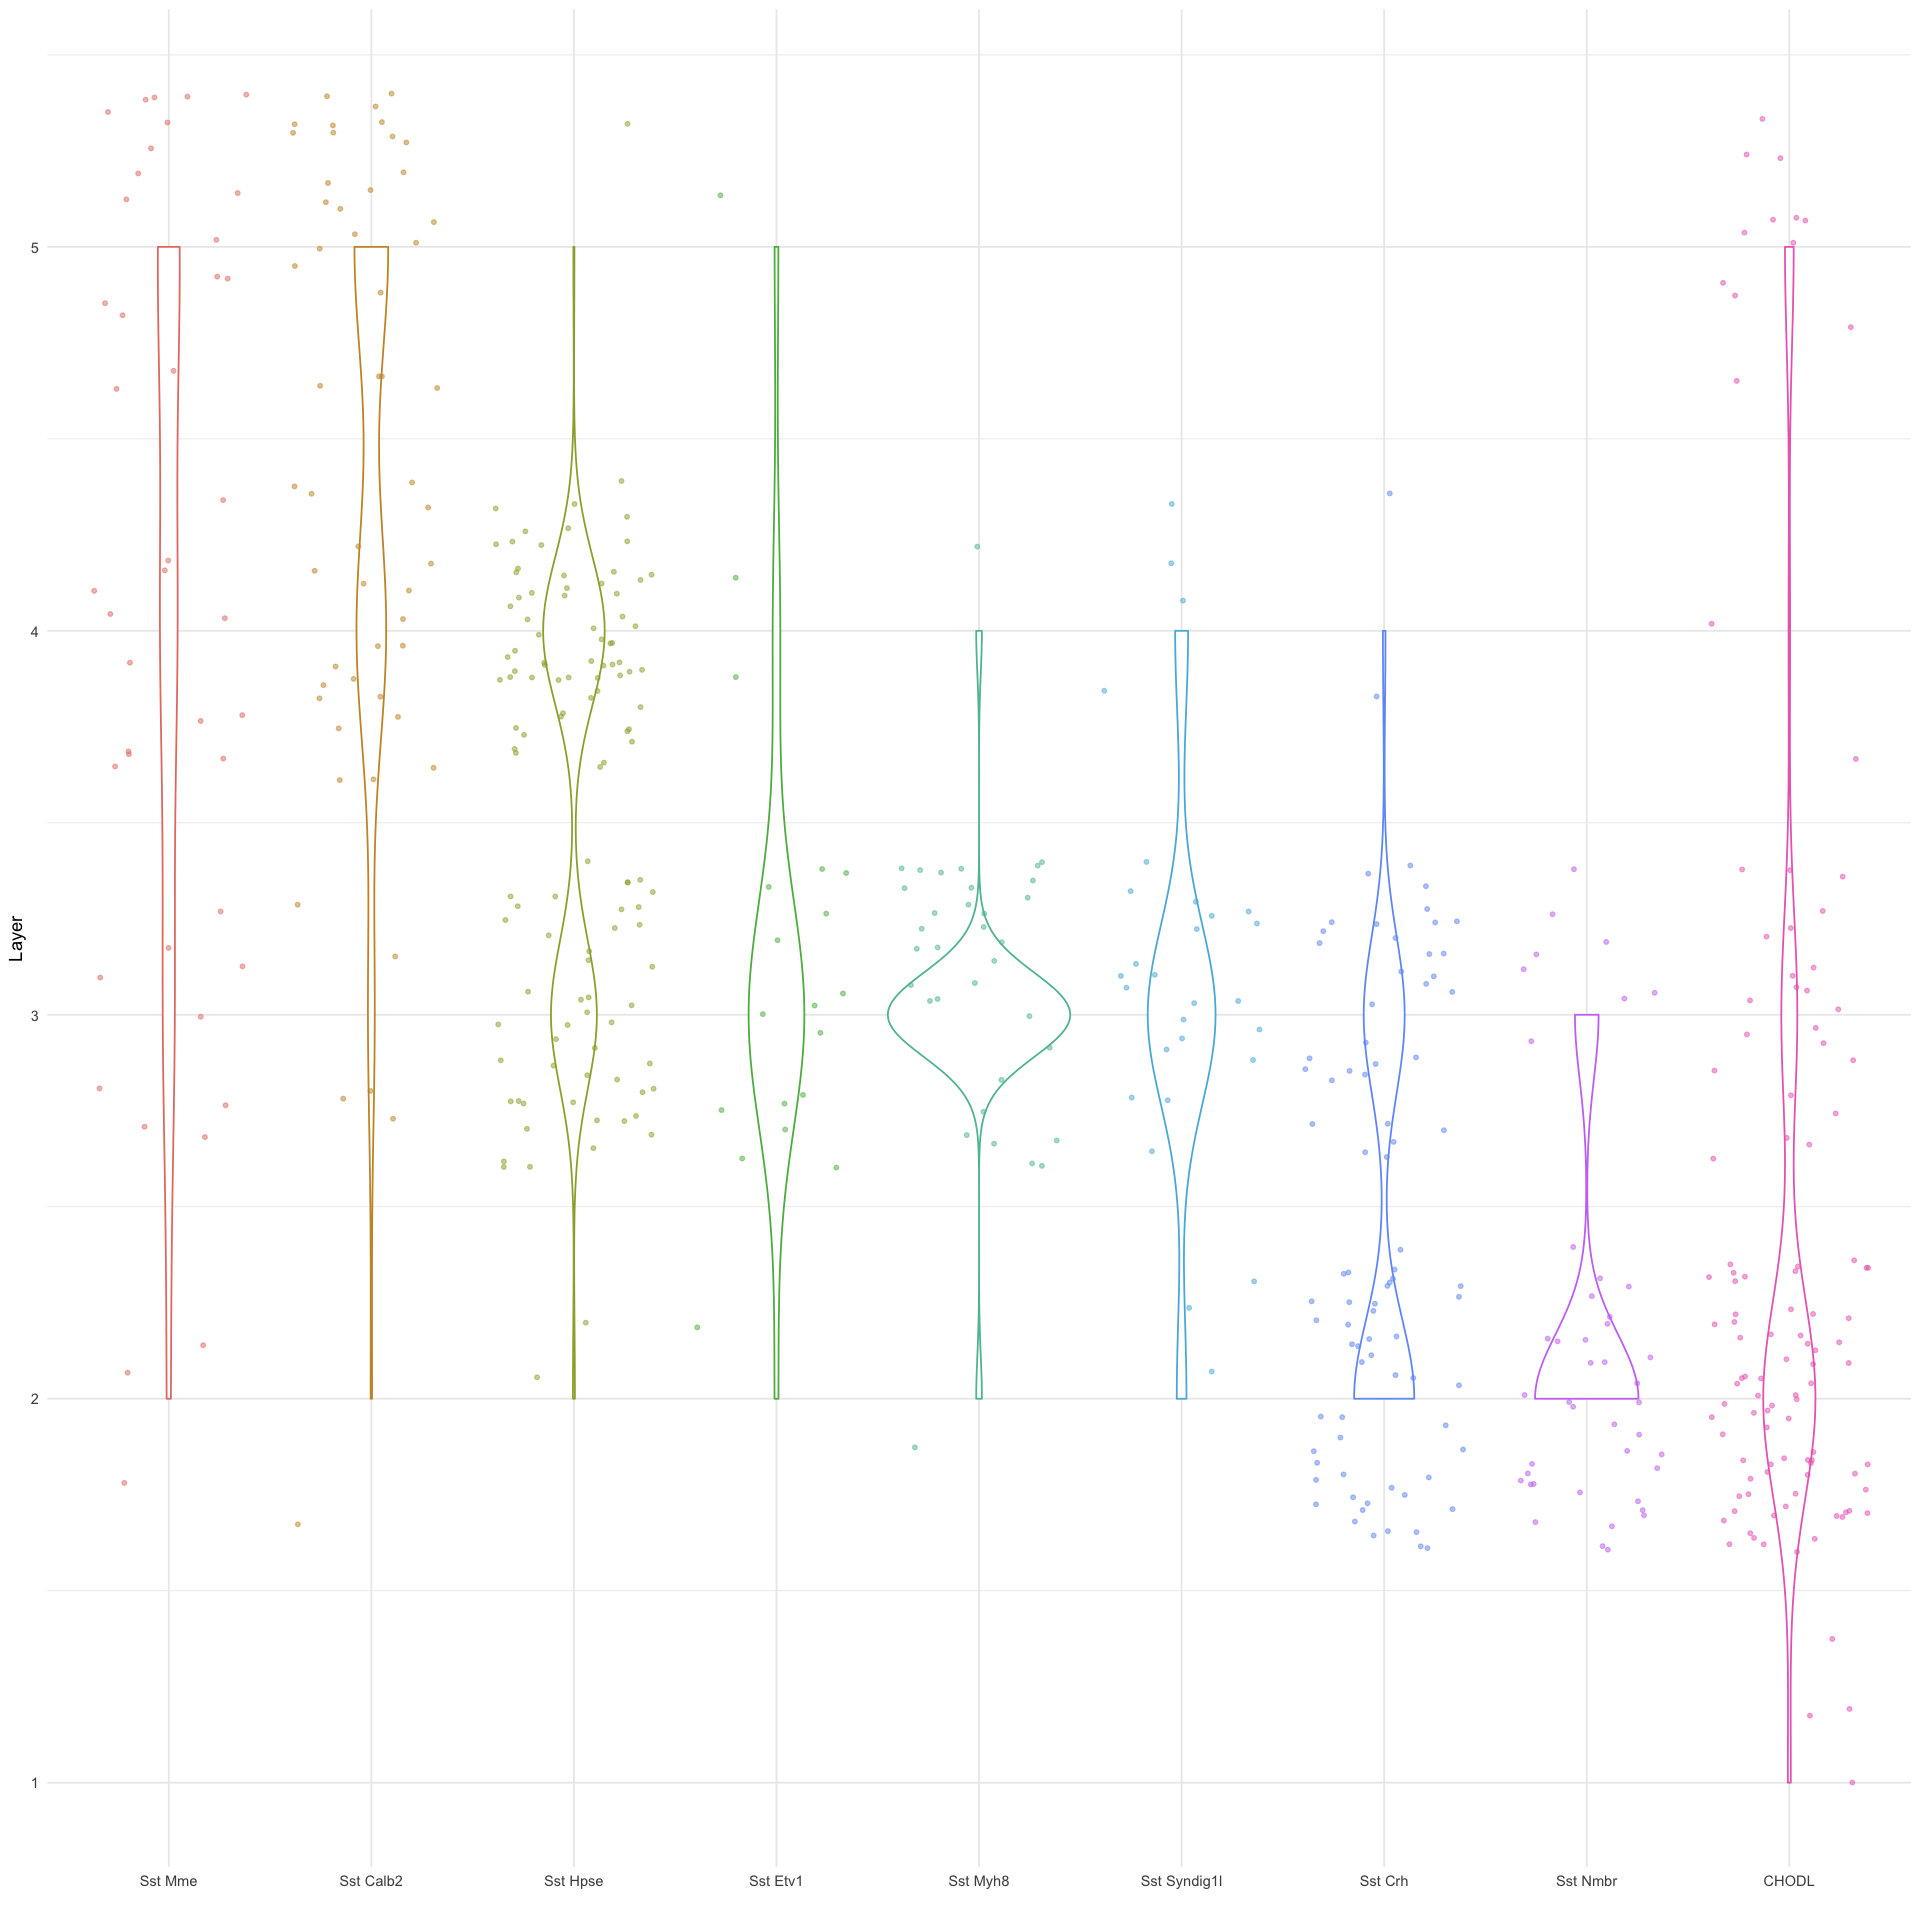

In [13]:
options(repr.plot.width = 16, repr.plot.height = 16)
boxer = read.csv('./1_ANALYSIS/boxer_a.csv',header=T,check.names = F)
boxer = melt(boxer)

my_ord_smrt = c('Sst Mme', 'Sst Calb2',
              'Sst Hpse', 'Sst Etv1','Sst Myh8',
              'Sst Syndig1l', 'Sst Crh','Sst Nmbr',
              'CHODL')
my_ord_l = c('L2_3','L4','L5','L6','L6b')
boxer$id = factor(boxer$id, levels=my_ord_smrt)
boxer$L = factor(boxer$L, levels=rev(my_ord_l))

ggplot(boxer) + geom_violin(aes(x=id,y=as.numeric(L),color=id)) + 
geom_point(aes(x=id,y=as.numeric(L),color=id),size=1,position = "jitter", alpha=0.5) +
 theme_minimal() + theme(legend.position="none") + ylab('Layer') +xlab('') +
scale_color_manual(values=c('#E57D72','#C89432','#9BAC37','#58B74C','#5CBEA0',
              '#58B6DE','#709BF8','#CB79F4','#EA6CBF'))

# ggsave('./FIGURES/subtypes_by_layers.pdf',height = 8,width = 8)

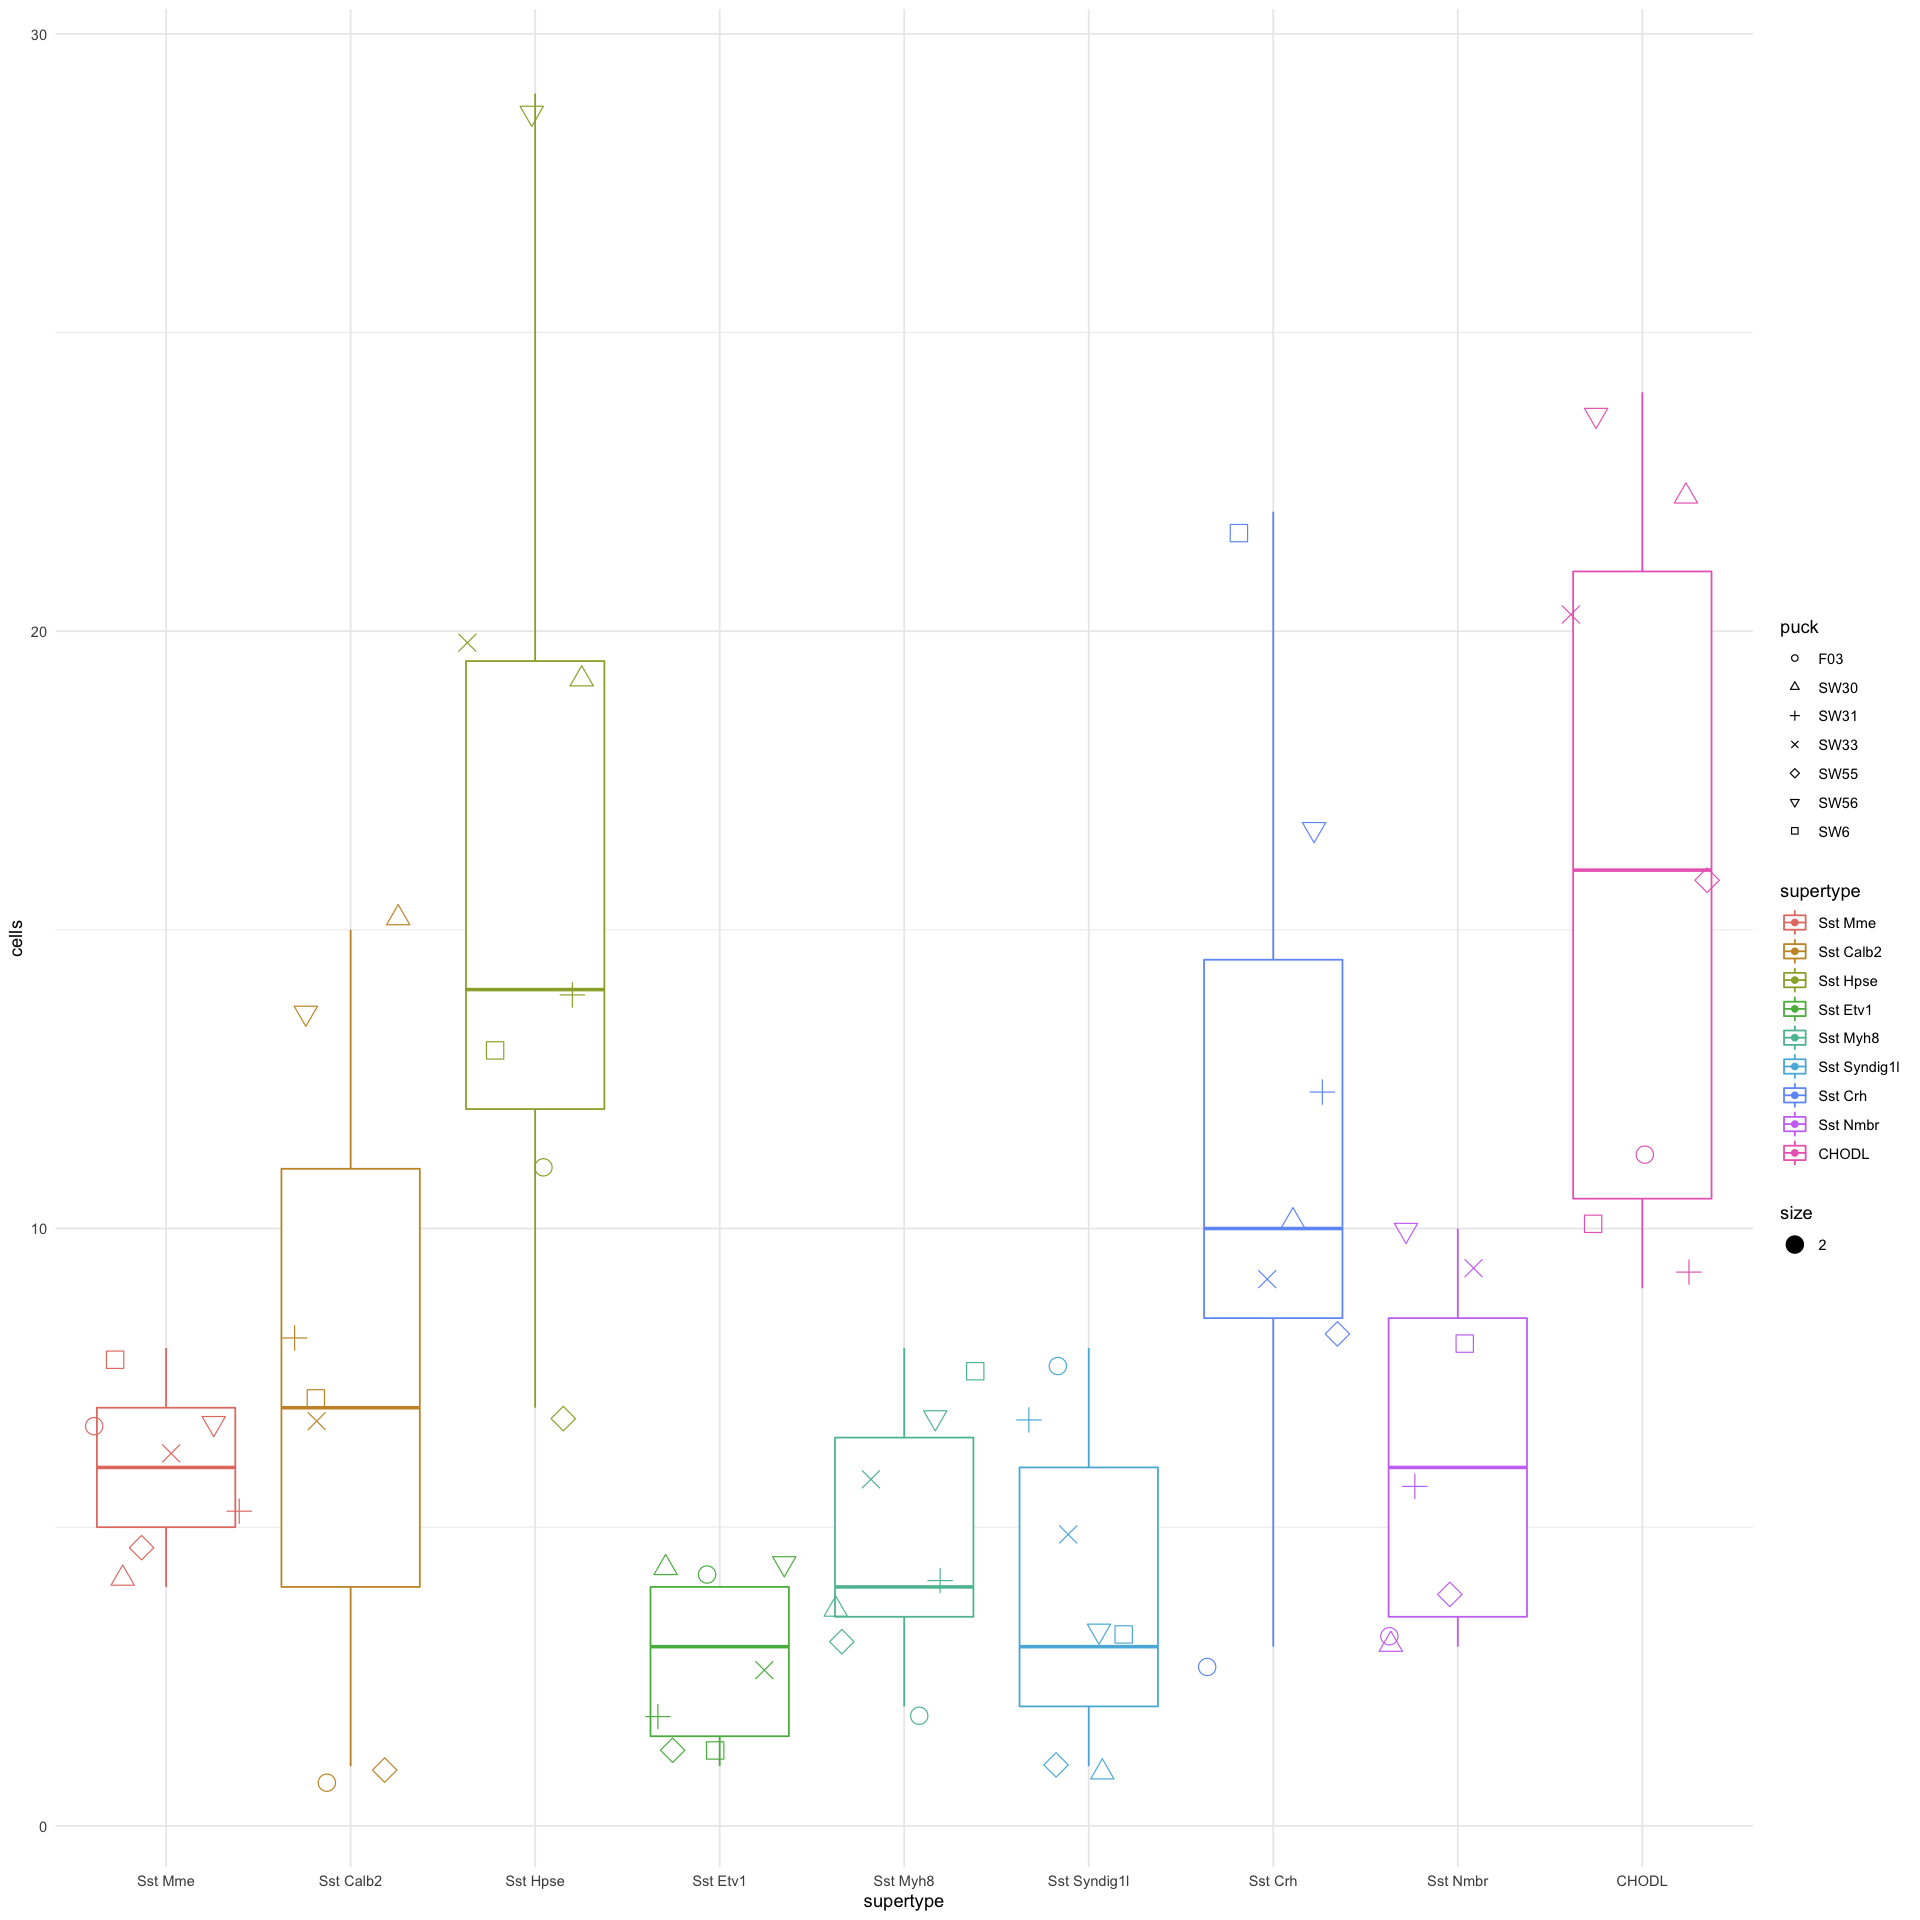

In [28]:
boxer_a = read.csv('./1_ANALYSIS//boxer_a.csv',header=T,check.names = F,row.names = 1)
colnames(boxer_a) = c('puck','supertype','L')
boxer_a = do.call(rbind,lapply(unique(boxer_a$puck),function(p){
    tmp = data.frame(melt(table(subset(boxer_a, puck==p,supertype))))
    colnames(tmp) = c('supertype','cells')
    tmp$puck = p
    return(tmp)
}))

boxer_a$supertype = factor(boxer_a$supertype, levels=my_ord_smrt)
pli = list('F03'=1,'SW30'=2,'SW31'=3,'SW33'=4,'SW55'=5,'SW56'=6,'SW6'=0)



ggplot(boxer_a) + geom_boxplot(aes(x=supertype,y=cells,color=supertype)) + 
geom_point(aes(shape=puck,x=supertype,y=cells, size=2,color=supertype),position = "jitter") + theme_minimal()+
scale_color_manual(values=c('#E57D72','#C89432','#9BAC37','#58B74C','#5CBEA0',
              '#58B6DE','#709BF8','#CB79F4','#EA6CBF')) + scale_shape_manual(values=pli)
# ggsave('FIGURES/all_subtype_by_puck.pdf',height = 15,width = 18)